<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/ProyectoML/EvolutivoLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
from tqdm import tqdm

In [12]:
# Definamos la tupla de funciones
G=(lambda x,y,z: 3*x**2 - y*np.exp(x*z) - z - 1., \
    lambda x,y,z: -x + 3*y + z - 3., \
    lambda x,y,z: 2*x + y + 4*z - 7.)

In [13]:
def GetF(G,r):

    n = r.shape[0]
    v = np.zeros_like(r)

    for i in range(n):
        v[i] = G[i](r[0],r[1],r[2])

    return v

In [14]:
def GetF(G,r):

    n = r.shape[0]
    v = np.zeros_like(r)

    for i in range(n):
        v[i] = G[i](r[0],r[1],r[2])

    return v

In [15]:
def Metric(G,r):
    return 0.5*np.linalg.norm(GetF(G,r))**2

In [16]:
Metric(G,np.array([1.,1.,1.]))

1.4762462210062797

In [17]:
def Plotter(e):

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    ax.set_title('Epoch={:.0f}'.format(e))

    return ax,ax1

In [20]:
class Robot:

    def __init__(self,f,Id=0,rate=0.1):

        self.Id = Id
        # Mutation Rate
        self.rate = rate
        self.Fitness = np.inf

        # Funcion a minimizar
        self.f = f

        # Espacio de parámetros
        self.r = np.random.uniform(5,6, size=3)

    def Mutate(self):

        self.r += np.random.normal( loc=0., scale = self.rate, size=3 )

    def GetR(self):
        return self.r

    def SetFitness(self):
        self.Fitness = self.f(G,self.GetR())

        # Fine tunning
        if self.Fitness < 0.05:
            self.rate = 0.005


    def GetFitness(self):
        return self.Fitness

In [21]:
def GetRobots(N):

    Robots = []

    for i in range(N):
        r = Robot(f=Metric,Id=i)
        Robots.append(r)

    return Robots

In [22]:
def Genetic(Robots, epochs = 5e2):


    # Guardamos los mas aptos
    N = int(0.5*len(Robots))

    # Mirar la aptitud más pequeña en cada epoca
    Fitness = np.array([])

    for e in range(int(epochs)):

        # actualizamos informaicíón
        for i,p in enumerate(Robots):
            p.Mutate()
            p.SetFitness()

        #clear_output(wait=True)


        # Ordenamos los robots por fitness
        scores = [ (p.Fitness, p) for p in Robots ]
        scores.sort(key = lambda x: x[0], reverse = False) # De menor a mayor

        # Tomamos lo incides hasta el % porciento
        Temp = [r[1] for i,r in enumerate(scores) if i < N ]

        for i,r in enumerate(Robots):
            j = i%N
            Robots[i] = copy.deepcopy(Temp[j])


        # Miramos el fitness de cada robot
        Fitness_ = [  r.GetFitness() for i,r in enumerate(Robots) ]

        # Guardamos la aptitud promedio
        Fitness = np.append(Fitness,np.mean(Fitness_))

        if Fitness[-1] < 0.0001:
            print('Entrenamiento terminado')
            break

        #ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(-0.2,0.9),frameon=False,fontsize=10)
        if e % 10 == 0:
            clear_output(wait=True)
            # Imagen para pintar
            ax,ax1 = Plotter(e)
            for i,p in enumerate(Robots):
                ax.scatter(p.GetR()[0],p.GetR()[1],marker='.',color='r',label='Id {}'.format(p.Id))
            ax.set_xlim(-5,5)
            ax.set_ylim(-5,5)

            # Funcion de Fitness
            ax1.set_title('Fitness function')
            ax1.plot(Fitness,color='k',label='Id {}, {:.2f}, {:.2f}, {:.2f}'.format(Robots[0].Id, Robots[0].GetR()[0],Robots[0].GetR()[1],Robots[0].GetR()[2]))
            ax1.set_xlabel('Epoch')
            ax1.legend(loc=1)

            plt.show()

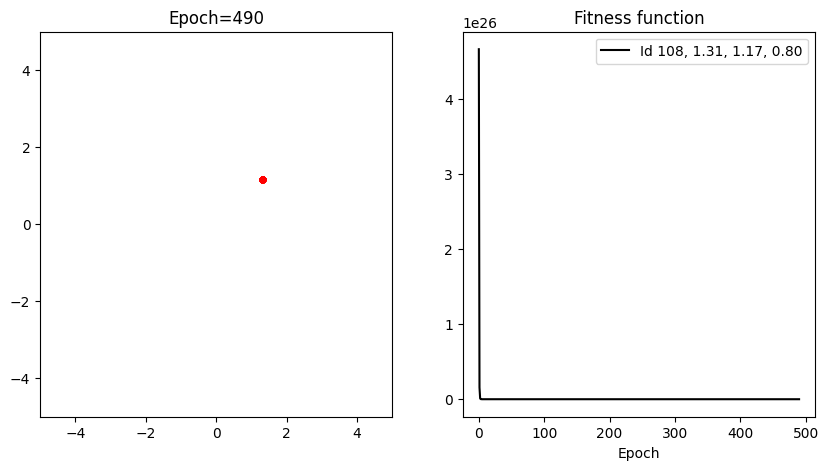

In [23]:
Robots = GetRobots(200)
Genetic(Robots)

In [25]:
params = np.array([ p.GetR() for i, p in enumerate(Robots)]).mean(axis=0)
params

array([1.31059371, 1.16927726, 0.80275429])

In [26]:
GetF(G,params)

array([ 1.85376221e-03, -7.64891538e-06,  1.48182536e-03])